In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Import clean data
gr_data = pd.read_csv('gr_data_CLEAN.csv')
gr_data = gr_data.drop(['Unnamed: 0'],axis=1)

In [3]:
display(gr_data.head(), gr_data.shape)

,title,series,author,description,language,pages,isbn,book_format,publish_year,first_publish_year,...,West Australian Young Readers' Book Award (WAYRBA) for Older Readers,West Australian Young Readers' Book Award (WAYRBA) for Younger Readers,William Allen White Children's Book Award,William C. Morris YA Debut Award Nominee,Women's Prize for Fiction Nominee,Women's Prize for Fiction Nominee for Longlist,World Fantasy Award Nominee for Best Novel,World Fantasy Award for Best Novel,Zilveren Griffel,الجائزة العالمية للرواية العربية (أي باف) / International Prize for Arabic Fiction (IPAF) Nominee
0,The Hunger Games,The Hunger Games,Suzanne Collins,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,200-300,9.78044E+12,Hardcover,2008,2008,...,1,0,0,0,0,0,0,0,0,0
1,Harry Potter and the Order of the Phoenix,Harry Potter,J.K. Rowling,There is a door at the end of a silent corrido...,English,700-800,9.78044E+12,Paperback,2004,2003,...,0,0,0,0,0,0,0,0,0,0
2,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,English,200-300,1E+13,Paperback,2006,1960,...,0,0,0,0,0,0,0,0,0,0
3,Pride and Prejudice,Single Book,Jane Austen,Alternate cover edition of ISBN 9780679783268S...,English,100-200,1E+13,Paperback,2000,2013,...,0,0,0,0,0,0,0,0,0,0
4,Twilight,The Twilight Saga,Stephenie Meyer,About three things I was absolutely positive.\...,English,400-500,9.78032E+12,Paperback,2006,2005,...,1,0,0,0,0,0,0,0,0,0


(52478, 863)

## Exploratory Data Analysis

#### Target to predict: rating

In [4]:
gr_data.rating

0        4.33
1        4.50
2        4.28
3        4.26
4        3.60
         ... 
52473    4.00
52474    4.19
52475    3.70
52476    3.85
52477    4.02
Name: rating, Length: 52478, dtype: float64

In [5]:
gr_data.rating.describe()

count    52478.000000
mean         4.021878
std          0.367146
min          0.000000
25%          3.820000
50%          4.030000
75%          4.230000
max          5.000000
Name: rating, dtype: float64

#### Title

In [6]:
# Top 20 rated books
top_20 = gr_data.nlargest(20, 'rating')
top_20[['title', 'rating']]

,title,rating
3989,Gris Ange 2014,5.0
4009,Das geheimnis der blumen (DEU),5.0
4405,Obscured Darkness (Family Secrets #2),5.0
5118,Rosto Inacabado (Pequenos segredos alquímicos)...,5.0
5162,Elliptical door (A multifaceted overview) (US)...,5.0
5716,Females of Valor,5.0
5740,The Daughter Of Kurdland: A Life Dedicated to ...,5.0
6829,Patience's Love,5.0
8659,Abstraction In Theory - Laws Of Physical Trans...,5.0
9002,Le Poinçon « Pilot Edition »,5.0


In [7]:
# Count number of books with rating 4.5 or more
num_top_rated_books = (gr_data['rating'] >= 5).sum()

print(f"Number of books with a rating of 5: {num_top_rated_books}")

Number of books with a rating of 5: 853


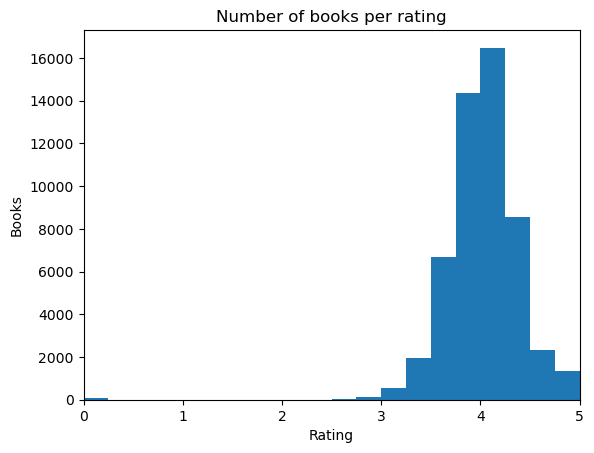

In [8]:
# Plot histogram number of books/Rating
plt.hist(gr_data['rating'], bins=20)
plt.xlim(0, 5)
plt.xlabel('Rating')
plt.ylabel('Books')
plt.title('Number of books per rating')
plt.show()

#### Series

In [9]:
# Book included in some series or not

# Group by 'series'
series_group = gr_data.groupby('series')

# Average rating for titles with a series value other than 'Single Book'
avg_rating_series = round(gr_data[gr_data['series'] != 'Single Book']['rating'].mean(), 2)

# Average rating for titles with a series value of 'Single Book'
avg_rating_single = round(gr_data[gr_data['series'] == 'Single Book']['rating'].mean(), 2)

print("Average rating for titles included in a series:", avg_rating_series)
print("Average rating for titles not included in any series:", avg_rating_single)

Average rating for titles included in a series: 4.08
Average rating for titles not included in any series: 4.0


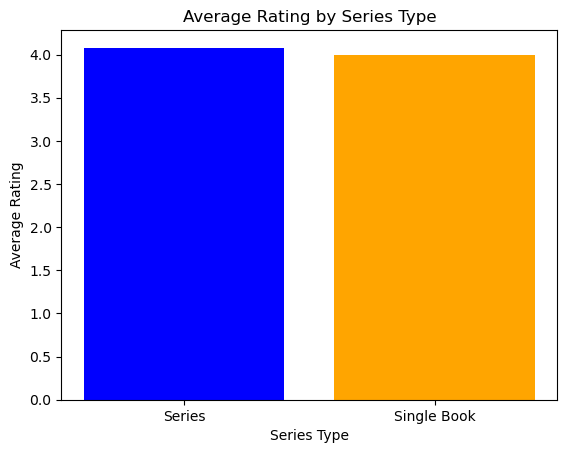

In [10]:
# Plot bar chart
plt.bar(['Series', 'Single Book'], [avg_rating_series, avg_rating_single], color=['blue', 'orange'])

# Title and axis labels
plt.title('Average Rating by Series Type')
plt.xlabel('Series Type')
plt.ylabel('Average Rating')
plt.show()

Being part of a literary series or saga seems not to affect average rating.

In [11]:
# Calculate the average rating per series
series_avg_rating = gr_data.groupby('series')['rating'].mean()

# Count the number of titles per series
series_title_counts = gr_data.groupby('series').size()

# Create a DataFrame from the series_avg_rating and series_title_counts
df_avg_rating = pd.DataFrame({
    'series': series_avg_rating.index,
    'avg_rating': series_avg_rating.values,
    'title_count': series_title_counts.values
})

df_avg_rating

,series,avg_rating,title_count
0,Damnatio Memoriae,4.165000,2
1,The Parchment Series,3.625000,2
2,The Wonderland Cycle,3.930000,3
3,أم العروسة / الحفيد,3.905000,2
4,世界一初恋 (The World's Greatest First Love),4.398750,8
...,...,...,...
4467,美少女戦士セーラームーン / Bishōjo Senshi Sailor Moon,4.395000,2
4468,美少女戦士セーラームーン 新装版 / Bishōjo Senshi Sailor Moon ...,4.400000,2
4469,花のみぞ知る [Hana no mizoshiru],4.220000,3
4470,蟲師 [Mushishi],4.420000,2


In [12]:
gr_data.series.value_counts()

Single Book                         36378
Sweet Valley Kids                      58
Nancy Drew Mystery Stories             55
Rogue Angel                            53
A Shade of Vampire                     50
                                    ...  
Olivia                                  2
Mercedes Thompson Graphic Novels        2
Radlett and Montdore                    2
Alper Kamu                              2
Soul Guardians                          2
Name: series, Length: 4472, dtype: int64

In [13]:
# count the number of series with 'Attack on Titan' substring
count_series = len(gr_data[gr_data['series'].str.contains('Attack on Titan')]['series'].unique())

# print the count
print(f"There are {count_series} series with 'Attack on Titan' in the name.")

There are 1 series with 'Attack on Titan' in the name.


#### Book Format

In [14]:
# Book format and rating

# Average rating for unique book_format
avg_rating_format = gr_data.groupby('book_format')['rating'].mean().round(2)

avg_rating_format

book_format
Audio                      4.08
Boardbook                  4.11
Boxset                     4.38
Ebook                      4.11
Graphic Novel and Comic    4.34
Hardcover                  4.00
Other formats              4.11
Paperback                  4.01
Special Edition            4.27
Unknown                    3.99
Name: rating, dtype: float64

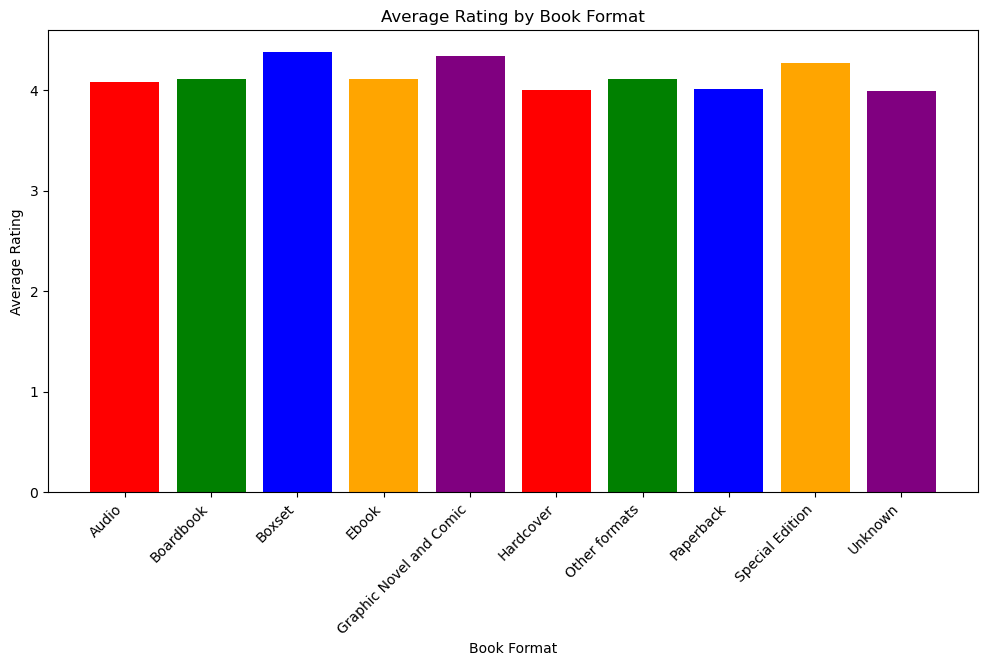

In [15]:
# Bar chart

# Set figsize to (width, height) and colors
fig, ax = plt.subplots(figsize=(12, 6))  
ax.bar(avg_rating_format.index, avg_rating_format, color=['red', 'green', 'blue', 'orange', 'purple'])

# Set chart title and axis labels
ax.set_title('Average Rating by Book Format')
ax.set_xlabel('Book Format')
ax.set_ylabel('Average Rating')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

In [16]:
gr_data.columns

Index(['title', 'series', 'author', 'description', 'language', 'pages', 'isbn',
       'book_format', 'publish_year', 'first_publish_year',
       ...
       'West Australian Young Readers' Book Award (WAYRBA) for Older Readers ',
       'West Australian Young Readers' Book Award (WAYRBA) for Younger Readers ',
       'William Allen White Children's Book Award ',
       'William C. Morris YA Debut Award Nominee ',
       'Women's Prize for Fiction Nominee ',
       'Women's Prize for Fiction Nominee for Longlist ',
       'World Fantasy Award Nominee for Best Novel ',
       'World Fantasy Award for Best Novel ', 'Zilveren Griffel ',
       'الجائزة العالمية للرواية العربية (أي باف) / International Prize for Arabic Fiction (IPAF) Nominee '],
      dtype='object', length=863)